## Work Duration Binning

In [1]:
import pandas as pd
import numpy as np

#df = pd.read_csv('new_combined_with_text_data.csv')
#df = pd.read_csv('updated_quitting_predictor_data.csv')
df = pd.read_csv('updated_quitting_predictor_data3.csv')

df['time_duration_1'].fillna(0, inplace=True)
df['time_duration_2'].fillna(0, inplace=True)
df['time_duration_3'].fillna(0, inplace=True)
df['time_duration_4'].fillna(0, inplace=True)
df['time_duration_5'].fillna(0, inplace=True)


/var/folders/74/37xhv12j1_b0bpxcvmn65x_h0000gn/T/ipykernel_30249/1832171052.py:6: DtypeWarning: Columns (61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('updated_quitting_predictor_data3.csv')


In [2]:
df.columns

Index(['profile_url', 'First Name', 'Middle Name', 'Surname', 'Linkedin_url',
       'connections', 'Summary', 'Skills', 'education level', 'title_1',
       ...
       'skills_sql', 'Word_Count', 'summary_is_null', 'skills_is_null', 'peak',
       'bins', 'company_work_dur_check', 'title_work_dur_check', 'norm_salary',
       'avg_salary'],
      dtype='object', length=134)

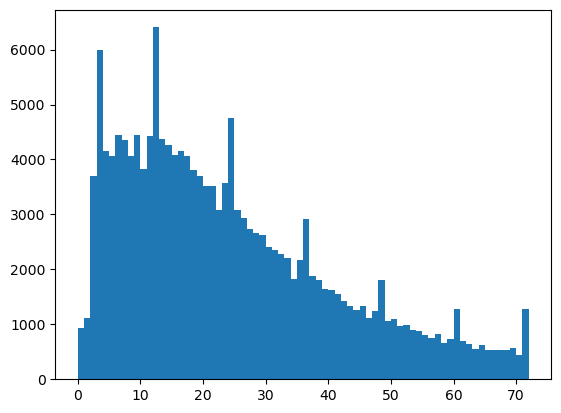

In [3]:
import matplotlib.pyplot as plt

plt.hist(df['time_duration_2'],bins = 72, range = (0,72))
plt.show()

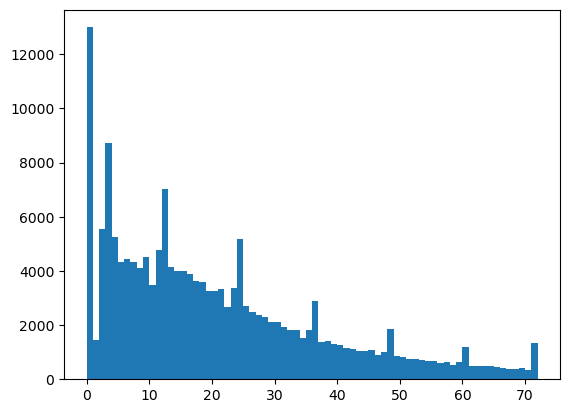

In [4]:
plt.hist(df['time_duration_3'],bins = 72, range = (0,72))
plt.show()

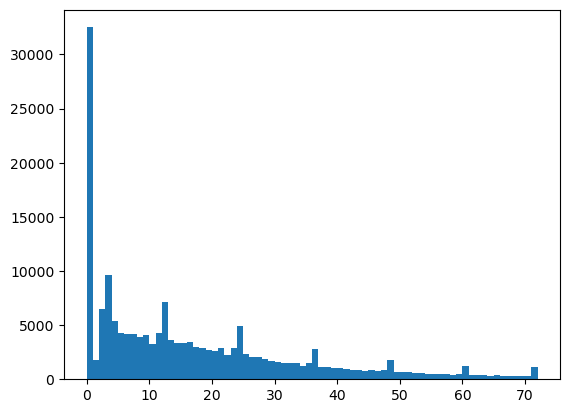

In [5]:
plt.hist(df['time_duration_4'],bins = 72, range = (0,72))
plt.show()

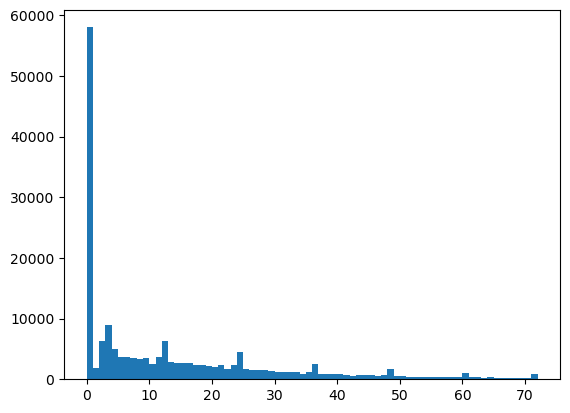

In [6]:
plt.hist(df['time_duration_5'],bins = 72, range = (0,72))
plt.show()

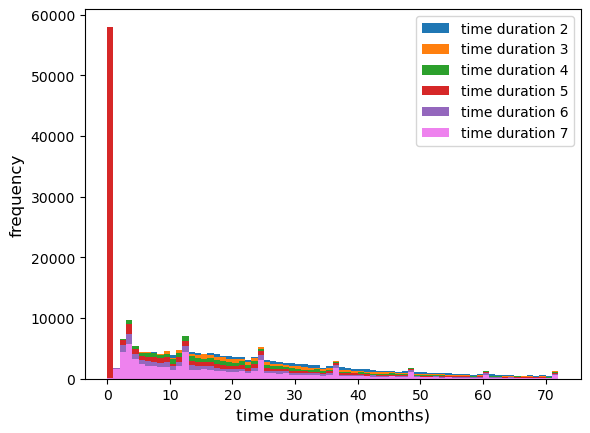

In [7]:
plt.hist(df['time_duration_2'],bins = 72, range = (0,72),label='time duration 2')
plt.hist(df['time_duration_3'],bins = 72, range = (0,72),label='time duration 3')
plt.hist(df['time_duration_4'],bins = 72, range = (0,72),label='time duration 4')
plt.hist(df['time_duration_5'],bins = 72, range = (0,72),label='time duration 5')
plt.hist(df['time_duration_6'],bins = 72, range = (0,72),label='time duration 6')
plt.hist(df['time_duration_7'],bins = 72, range = (0,72),label='time duration 7',color='violet')
plt.xlabel('time duration (months)', fontsize=12, fontweight='normal')
plt.ylabel('frequency', fontsize=12, fontweight='normal')
plt.legend()
plt.show()

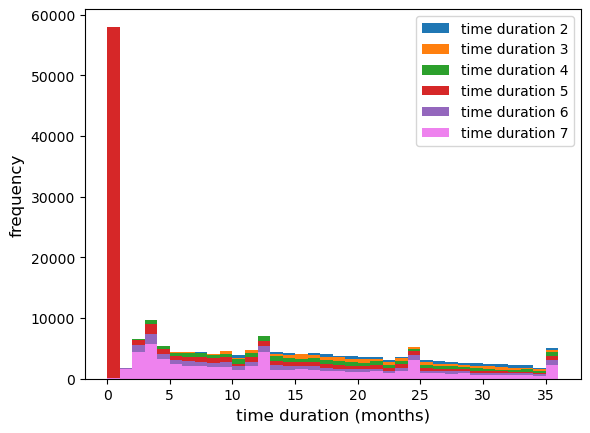

In [8]:
plt.hist(df['time_duration_2'],bins = 36, range = (0,36),label='time duration 2')
plt.hist(df['time_duration_3'],bins = 36, range = (0,36),label='time duration 3')
plt.hist(df['time_duration_4'],bins = 36, range = (0,36),label='time duration 4')
plt.hist(df['time_duration_5'],bins = 36, range = (0,36),label='time duration 5')
plt.hist(df['time_duration_6'],bins = 36, range = (0,36),label='time duration 6')
plt.hist(df['time_duration_7'],bins = 36, range = (0,36),label='time duration 7', color='violet')
plt.xlabel('time duration (months)', fontsize=12, fontweight='normal')
plt.ylabel('frequency', fontsize=12, fontweight='normal')
plt.legend()
plt.show()

In [9]:
# List of peak values
peak_values = [3.0, 12.0, 24.0, 36.0, 48.0, 60.0, 72.0, 84.0, 96.0, 108.0]

# Function to check if value is in the 'peak_values' list
def is_peak(value):
    return int(value in peak_values)

# Create the 'peaks' column using the apply method
df['peak'] = df['time_duration_1'].apply(is_peak)


def between(value):
    if value<3:
        return(0)
    elif value == 3:
        return(1)
    elif 3<value<12:
        return(2)
    elif value == 12:
        return(3)
    elif 12<value<24:
        return(4)
    elif value == 24:
        return(5)
    elif 24<value<36:
        return(6)
    elif value == 36:
        return(7)
    elif 36<value<48:
        return(8)
    elif value == 48:
        return(9)
    elif 48<value<60:
        return(10)
    elif value == 60:
        return(11)
    elif 60<value<72:
        return(12)
    elif value == 72:
        return(13)
    elif 72<value<84:
        return(14)
    elif value == 84:
        return(15)
    elif 84<value<96:
        return(16)
    elif value == 96:
        return(17)
    elif 96<value<108:
        return(18)
    elif value == 108:
        return(19)
    elif 108<value:
        return(20)
    
df['bins'] = df['time_duration_1'].apply(between)


# Display the updated dataframe
df[['time_duration_1','bins','peak']][:20]

,time_duration_1,bins,peak
0,19.0,4,0
1,24.0,5,1
2,24.0,5,1
3,27.0,6,0
4,9.0,2,0
5,2.0,0,0
6,68.0,12,0
7,23.0,4,0
8,18.0,4,0
9,4.0,2,0


In [10]:
mask_quitter = (df['Quitter']==1)
mask_nonquitter = (df['Quitter']==0)

quitter = df[mask_quitter]
nonquitter = df[mask_nonquitter]

In [11]:
q_peak = np.sum(quitter['peak']==1)
q_not_peak = np.sum(quitter['peak']==0)
q_tot = len(quitter)

print('Quitter')
print('% peak: ',q_peak/q_tot)
print('% not peak: ',q_not_peak/q_tot)

Quitter
% peak:  0.09686192468619247
% not peak:  0.9031380753138075


In [12]:
nq_peak = np.sum(nonquitter['peak']==1)
nq_tot = len(nonquitter)
nq_not_peak = np.sum(nonquitter['peak']==0)

print('NonQuitter')
print('% peak: ',nq_peak/nq_tot)
print('% not peak: ',nq_not_peak/nq_tot)

NonQuitter
% peak:  0.08856075216972034
% not peak:  0.9114392478302796


In [13]:
q_vc = quitter['bins'].value_counts().sort_index()/len(quitter)
nq_vc = nonquitter['bins'].value_counts().sort_index()/len(nonquitter)

In [14]:
'''
bar_width = 0.35
x = range(len(quitter_bins_counts))

# Plot the two bar charts side by side
plt.figure(figsize=(10, 6))
plt.bar(x, q_vc, width=bar_width, label='Quitter')
plt.bar([i + bar_width for i in x], nq_vc, width=bar_width, label='NonQuitter')
plt.xlabel('time_duration_1 Bins')
plt.ylabel('Percentage (%)')
plt.title('Value Counts of Quitters and NonQuitters')
plt.xticks(range(0,21))  
plt.grid(axis='y') 
plt.legend()
plt.show()
'''

"\nbar_width = 0.35\nx = range(len(quitter_bins_counts))\n\n# Plot the two bar charts side by side\nplt.figure(figsize=(10, 6))\nplt.bar(x, q_vc, width=bar_width, label='Quitter')\nplt.bar([i + bar_width for i in x], nq_vc, width=bar_width, label='NonQuitter')\nplt.xlabel('time_duration_1 Bins')\nplt.ylabel('Percentage (%)')\nplt.title('Value Counts of Quitters and NonQuitters')\nplt.xticks(range(0,21))  \nplt.grid(axis='y') \nplt.legend()\nplt.show()\n"

### Company and Title Avg Time Duration

In [15]:
co_avg_dur = pd.read_csv('top4182_avg_duration_per_company.csv')
title_avg_dur = pd.read_csv('top845_duration_per_title.csv')

In [16]:
title_avg_dur

,title,count,title_avg_duration
0,software engineer,132662,36.785432
1,senior engineer,85530,51.271566
2,engineer manager,75877,53.237028
3,senior software engineer,53300,46.937036
4,principal software engineer,52319,54.263174
...,...,...,...
840,strategic account execut4e,30,46.600000
841,firmware engineer intern,30,5.466667
842,co-founder/cto,30,39.600000
843,senioranalyst,30,51.433333


In [17]:
# Assuming 'co_avg_dur' is a DataFrame with columns 'company' and 'co_avg_duration'
# Assuming 'df' is a DataFrame with columns 'company_2' and 'work_duration_2'

# Step 1: Calculate the average work duration for each company
avg_work_duration_dict = co_avg_dur.set_index('Company')['co_avg_duration'].to_dict()

# Step 2: Create an empty list to store the percentage values
co_percentage_values = []

# Step 3 to Step 7: Calculate the percentage of company average for each row in 'df'
for _, row in df.iterrows():
    company = row['company_1']
    work_duration = row['time_duration_1']
    
    # Step 4: Get the average work duration for the current company
    company_avg_duration = avg_work_duration_dict.get(company, None)
    
    # Step 5: Calculate the percentage of the company average work duration
    if company_avg_duration is not None and work_duration is not None and work_duration > 0:
        percentage = (work_duration / company_avg_duration)
    else:
        percentage = None
    
    # Step 6: Add the percentage value to the list
    co_percentage_values.append(percentage)

# Step 7: Add the list as a new column 'check_work_dur' to the 'df' DataFrame
df['company_work_dur_check'] = co_percentage_values


In [18]:
df[['company_1','time_duration_1','company_work_dur_check']][:25]

,company_1,time_duration_1,company_work_dur_check
0,All Digital Rewards,19.0,NaN
1,707 Shoes,24.0,NaN
2,Intrado,24.0,0.378113
3,Wells Fargo,27.0,0.680669
4,General Motors,9.0,0.183074
5,"Shurtape Technologies, LLC",2.0,NaN
6,IBM,68.0,0.935618
7,Mighty AI,23.0,NaN
8,Lifetime Brands,18.0,NaN
9,Northrop Grumman,4.0,0.086118


In [19]:
# Assuming 'co_avg_dur' is a DataFrame with columns 'company' and 'co_avg_duration'
# Assuming 'df' is a DataFrame with columns 'company_2' and 'work_duration_2'

# Step 1: Calculate the average work duration for each company
title_work_duration_dict = title_avg_dur.set_index('title')['title_avg_duration'].to_dict()

# Step 2: Create an empty list to store the percentage values
title_percentage_values = []

# Step 3 to Step 7: Calculate the percentage of company average for each row in 'df'
for _, row in df.iterrows():
    title = row['title_1']
    work_duration = row['time_duration_1']
    
    # Step 4: Get the average work duration for the current company
    title_avg_duration = title_work_duration_dict.get(title, None)
    
    # Step 5: Calculate the percentage of the company average work duration
    if title_avg_duration is not None and work_duration is not None and work_duration > 0:
        percentage = (work_duration / title_avg_duration)
    else:
        percentage = None
    
    # Step 6: Add the percentage value to the list
    title_percentage_values.append(percentage)

# Step 7: Add the list as a new column 'check_work_dur' to the 'df' DataFrame
df['title_work_dur_check'] = title_percentage_values

In [20]:
df[['title_1','time_duration_1','title_work_dur_check']][:25]

,title_1,time_duration_1,title_work_dur_check
0,senior software developer,19.0,0.402817
1,company owner,24.0,0.335196
2,chief technology officer,24.0,0.427916
3,it developer,27.0,0.888611
4,software developer,9.0,0.275055
5,engineer manager,2.0,0.037568
6,software engineer,68.0,1.848558
7,principal software engineer,23.0,0.423860
8,business intelligence developer,18.0,0.444699
9,software engineer,4.0,0.108739


In [21]:
for i in df.columns:
    print(i)

profile_url
First Name
Middle Name
Surname
Linkedin_url
connections
Summary
Skills
education level
title_1
company_1
time_duration_1
Job_Description_1
title_2
company_2
time_duration_2
Job_Description_2
title_3
company_3
time_duration_3
Job_Description_3
title_4
company_4
time_duration_4
Job_Description_4
title_5
company_5
time_duration_5
Job_Description_5
title_6
company_6
time_duration_6
Job_Description_6
title_7
company_7
time_duration_7
Job_Description_7
title_8
company_8
time_duration_8
Job_Description_8
title_9
company_9
time_duration_9
Job_Description_9
title_10
company_10
time_duration_10
Job_Description_10
school_name_1
ed_time_duration_1
degree_name_1
education_fos_1
school_name_2
ed_time_duration_2
degree_name_2
education_fos_2
school_name_3
ed_time_duration_3
degree_name_3
education_fos_3
Country
State
City
job 1 location
job 2 location
job 3 location
job 4 location
job 5 location
job 6 location
job 7 location
job 8 location
job 9 location
job 10 location
school_name_4
ed_t

### avg salary data

In [22]:
salary = pd.read_csv('comp_salary_total.csv')

In [23]:
salary

,Company,Average Salary,Median Salary,Count
0,coupang,162782.818182,158235.0,33
1,reddit,161469.455696,161732.0,79
2,linkedin,161420.197531,159647.0,81
3,meta,161144.943069,156379.5,404
4,elastic,160883.400000,160981.0,15
...,...,...,...,...
1017,penn state,90962.944444,92708.5,18
1018,republic services,89758.352941,90135.0,17
1019,arconic,88684.650000,89363.0,20
1020,the johns hopkins university,88587.551724,83457.0,29


In [24]:
# Step 1: Calculate the average work duration for each company
salary_dict = salary.set_index('Company')['Average Salary'].to_dict()

# Step 2: Create an empty list to store the percentage values
salary_values = []

# Step 3 to Step 7: Calculate the percentage of company average for each row in 'df'
for _, row in df.iterrows():
    company = str(row['company_1']).lower()
    #work_duration = row['time_duration_1']
    
    # Step 4: Get the average work duration for the current company
    company_avg_salary = salary_dict.get(company)
    
    # Step 5: Calculate the percentage of the company average work duration
    #if company_avg_salary is not None:
    #    percentage = (work_duration / company_avg_duration)
    #else:
    #    percentage = None
    
    # Step 6: Add the percentage value to the list
    salary_values.append(company_avg_salary)

# Step 7: Add the list as a new column 'check_work_dur' to the 'df' DataFrame
df['avg_salary'] = salary_values

df['norm_salary'] = df['avg_salary']/df['avg_salary'].mean()

'''
mask_quitter = (df['Quitter']==1)
mask_nonquitter = (df['Quitter']==0)
quitter = df[mask_quitter]
nonquitter = df[mask_nonquitter]
avg_sal_q = np.mean(quitter['avg_salary'])
avg_sal_nq = np.mean(nonquitter['avg_salary'])
df['norm_salary'] = df.apply(lambda row: row['avg_salary'] / avg_sal_q if row['Quitter'] == 1 else row['avg_salary'] / avg_sal_nq, axis=1)
'''

"\nmask_quitter = (df['Quitter']==1)\nmask_nonquitter = (df['Quitter']==0)\nquitter = df[mask_quitter]\nnonquitter = df[mask_nonquitter]\navg_sal_q = np.mean(quitter['avg_salary'])\navg_sal_nq = np.mean(nonquitter['avg_salary'])\ndf['norm_salary'] = df.apply(lambda row: row['avg_salary'] / avg_sal_q if row['Quitter'] == 1 else row['avg_salary'] / avg_sal_nq, axis=1)\n"

In [25]:
df[['company_1','norm_salary','avg_salary']]

,company_1,norm_salary,avg_salary
0,All Digital Rewards,NaN,NaN
1,707 Shoes,NaN,NaN
2,Intrado,NaN,NaN
3,Wells Fargo,0.886763,118706.140625
4,General Motors,NaN,NaN
...,...,...,...
185035,Cisco,NaN,NaN
185036,Fannie Mae,0.888594,118951.205882
185037,Apple,1.068848,143080.792683
185038,Robinhood,0.898452,120270.812500


In [27]:
np.sum(df[['company_1','avg_salary']].isnull())

company_1         31
avg_salary    111861
dtype: int64

In [28]:
mask_quitter = (df['Quitter']==1)
mask_nonquitter = (df['Quitter']==0)

quitter = df[mask_quitter]
nonquitter = df[mask_nonquitter]

In [29]:
print('Average salary per company: ')
print('Quitters')
#print(np.mean(quitter['title_work_dur_check']))
#print(np.mean(quitter['company_work_dur_check']))
print(np.mean(quitter['norm_salary']))
print()
print('NonQuitters')
#print(np.mean(nonquitter['title_work_dur_check']))
#print(np.mean(nonquitter['company_work_dur_check']))
print(np.mean(nonquitter['norm_salary']))

Average salary per company: 
Quitters
0.984247539059175

NonQuitters
1.001233707560717


In [30]:
np.sum(quitter[['company_1','avg_salary']].isnull())

print('percent null:',13805/len(quitter))

percent null: 0.7220188284518828


In [31]:
np.sum(nonquitter[['company_1','avg_salary']].isnull())

print('percent null:',98056/len(nonquitter))

percent null: 0.590983606557377


In [ ]:
#df.drop('salary',inplace=True, axis=1)

In [38]:
for i in df.columns:
    print(i)

profile_url
First Name
Middle Name
Surname
Linkedin_url
connections
Summary
Skills
education level
title_1
company_1
time_duration_1
Job_Description_1
title_2
company_2
time_duration_2
Job_Description_2
title_3
company_3
time_duration_3
Job_Description_3
title_4
company_4
time_duration_4
Job_Description_4
title_5
company_5
time_duration_5
Job_Description_5
title_6
company_6
time_duration_6
Job_Description_6
title_7
company_7
time_duration_7
Job_Description_7
title_8
company_8
time_duration_8
Job_Description_8
title_9
company_9
time_duration_9
Job_Description_9
title_10
company_10
time_duration_10
Job_Description_10
school_name_1
ed_time_duration_1
degree_name_1
education_fos_1
school_name_2
ed_time_duration_2
degree_name_2
education_fos_2
school_name_3
ed_time_duration_3
degree_name_3
education_fos_3
Country
State
City
job 1 location
job 2 location
job 3 location
job 4 location
job 5 location
job 6 location
job 7 location
job 8 location
job 9 location
job 10 location
school_name_4
ed_t

In [ ]:
# Step 1: Read the 'raw_data.csv' file into a new DataFrame
raw_data_df = pd.read_csv('DATA.csv')

/var/folders/74/37xhv12j1_b0bpxcvmn65x_h0000gn/T/ipykernel_7858/3841405019.py:2: DtypeWarning: Columns (3,4,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,101,102,103,104,105,108,109,110,111) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data_df = pd.read_csv('DATA.csv')


In [ ]:
# Step 2: Merge the DataFrames based on 'profile_url' to fill in the missing values
merged_df = df.merge(raw_data_df[['Linkedin_url', 'State']], on='Linkedin_url', how='left', suffixes=('', '_from_raw_data'))

# Step 3: Update the 'State' column in 'df' with non-null values from 'State_from_raw_data'
merged_df['State'] = merged_df['State'].fillna(merged_df['State_from_raw_data'])

# Step 4: Drop the temporary 'State_from_raw_data' column
merged_df.drop(columns='State_from_raw_data', inplace=True)

In [32]:
# Write out updated dataset

df.to_csv('quitting_data2.csv', index=False)